## Noteboook for converting wav files to Mel-spectrogram

In [2]:
# !pip install librosa

In [18]:
import librosa # Audio processing library
import numpy as np
import IPython.display # For playing the audio in jupyter notebook 
import librosa.display # For displaying spectrograms
import matplotlib.pyplot as plt # Useless piece of library that I don't like. Seriously why do people use it

In [19]:
y, sr = librosa.load("../Downloads/IEMOCAP_full_release/\
Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F005.wav", sr = 44100) # Test file read in custom sampling rate 

### Reason for using sr = 44100 [Nyquist theorem](https://www.sciencedirect.com/topics/engineering/nyquist-theorem#:~:text=This%20theorem%20states%20that%20the,accurate%20reconstruction%20from%20the%20samples.)

In [ ]:
IPython.display.Audio(data=y, rate=sr)

### Below is some things that might be interesting to know but not used in our process:
---

In [40]:
# How about separating harmonic and percussive components?
y_h, y_p = librosa.effects.hpss(y)

In [41]:
# Play the harmonic component
IPython.display.Audio(data=y_h, rate=sr)

In [42]:
# Play the percussive component
IPython.display.Audio(data=y_p, rate=sr)

In [20]:
# Pitch shifting?  Let's gear-shift by a major third (4 semitones)
y_shift = librosa.effects.pitch_shift(y, sr, 7)

IPython.display.Audio(data=y_shift, rate=sr)

/tmp/ipykernel_3927/2480177651.py:2: FutureWarning: Pass sr=22050, n_steps=7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_shift = librosa.effects.pitch_shift(y, sr, 7)


In [21]:
# Or time-stretching?  Let's slow it down
y_slow = librosa.effects.time_stretch(y, 0.5)

IPython.display.Audio(data=y_slow, rate=sr)

/tmp/ipykernel_3927/1910051196.py:2: FutureWarning: Pass rate=0.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_slow = librosa.effects.time_stretch(y, 0.5)


# Below is our process:
---

In [43]:
# How about something more advanced?  Let's decompose a spectrogram with NMF, and then resynthesize an individual component
D = librosa.stft(y)

In [44]:
D.shape

(1025, 348)

In [46]:
# Separate the magnitude and phase
S, phase = librosa.magphase(D)

# Decompose by nmf
components, activations = librosa.decompose.decompose(S, n_components=8, sort=True)

/home/tyson/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).


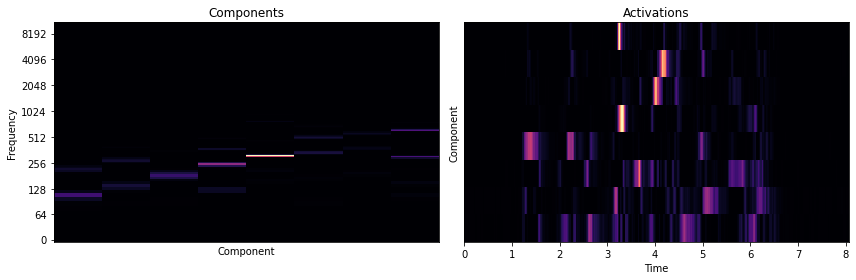

In [48]:
# Visualize the components and activations, just for fun

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(components**2.0, y_axis='log')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.title('Components')

plt.subplot(1,2,2)
librosa.display.specshow(activations, x_axis='time')
plt.xlabel('Time')
plt.ylabel('Component')
plt.title('Activations')

plt.tight_layout()

In [55]:
# Spectrogram: Discrete Fourier Transform where each data point (cut by sampling rate)  frequency is binned.
S = np.abs(librosa.stft(y))

In [56]:
S

array([[2.97067881e-01, 7.18669772e-01, 8.32326487e-02, ...,
        1.26954526e-01, 5.07386699e-02, 3.80175024e-01],
       [2.41826653e-01, 7.42165565e-01, 8.13152850e-01, ...,
        1.06122687e-01, 3.05419475e-01, 4.51931834e-01],
       [1.09867185e-01, 6.41535163e-01, 7.67184556e-01, ...,
        1.97097912e-01, 3.07487756e-01, 5.97797394e-01],
       ...,
       [3.50377435e-04, 1.74863177e-04, 1.14572742e-08, ...,
        1.50755177e-08, 1.11802263e-04, 2.67678668e-04],
       [3.50378716e-04, 1.74873159e-04, 2.47505874e-08, ...,
        7.18170412e-10, 1.11819361e-04, 2.67688127e-04],
       [3.50374321e-04, 1.74843357e-04, 2.59252477e-08, ...,
        1.35398075e-08, 1.11835587e-04, 2.67697556e-04]], dtype=float32)

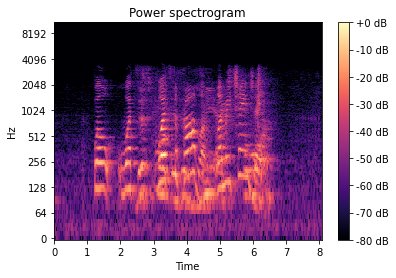

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [21]:
# Mel-spectrogram:
mel = librosa.feature.melspectrogram(y=y, sr=sr)

In [22]:
mel.shape

(128, 348)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

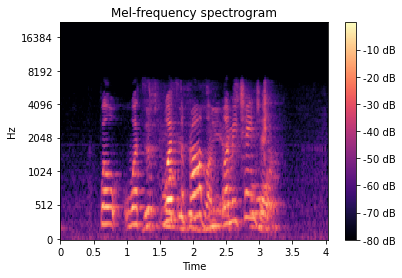

In [26]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(mel, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',sr = sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')